In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import polars as pl
sns.set_theme()

In [2]:
flights = sns.load_dataset("flights")
flights.head()

year,month,passengers
i64,cat,i64
1949,"""Jan""",112
1949,"""Feb""",118
1949,"""Mar""",132
1949,"""Apr""",129
1949,"""May""",121


/home/marcogorelli/seaborn-dev/seaborn/_oldcore.py:1066: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


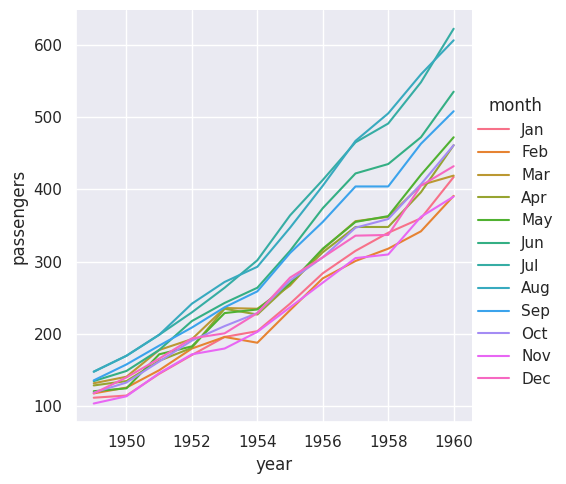

In [3]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

In [4]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

/tmp/ipykernel_11720/2807766033.py:1: DeprecationWarning: In a future version of polars, the default `aggregate_function` will change from `'first'` to `None`. Please pass `'first'` to keep the current behaviour, or `None` to accept the new one.
  flights_wide = flights.pivot(index="year", columns="month", values="passengers")


year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


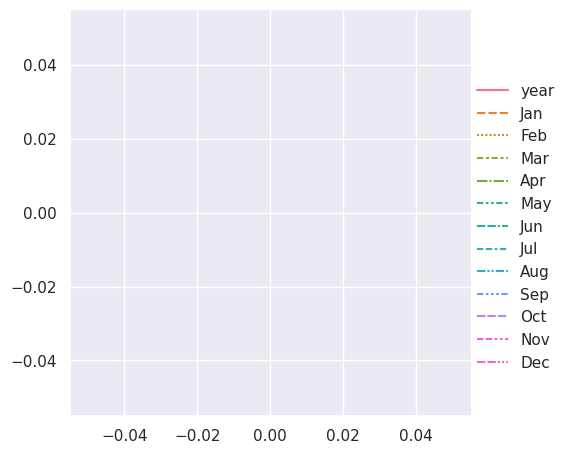

In [5]:
sns.relplot(data=flights_wide, kind="line")

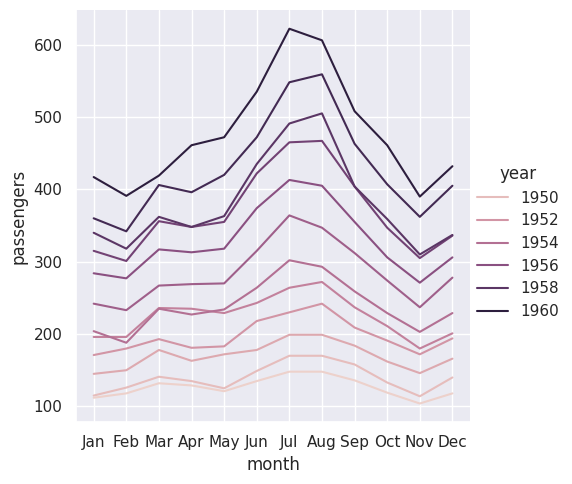

In [6]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

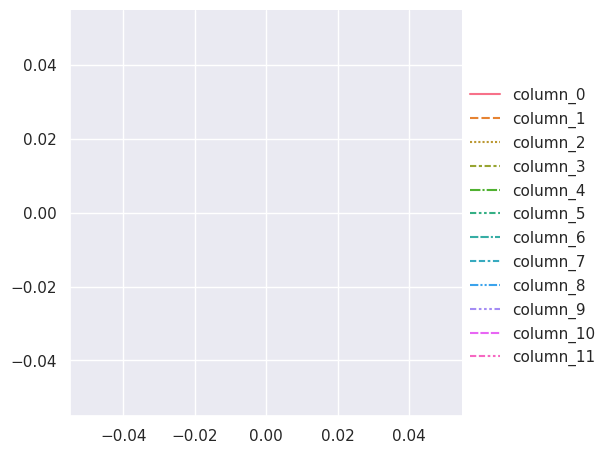

In [7]:
sns.relplot(data=flights_wide.transpose(), kind="line")

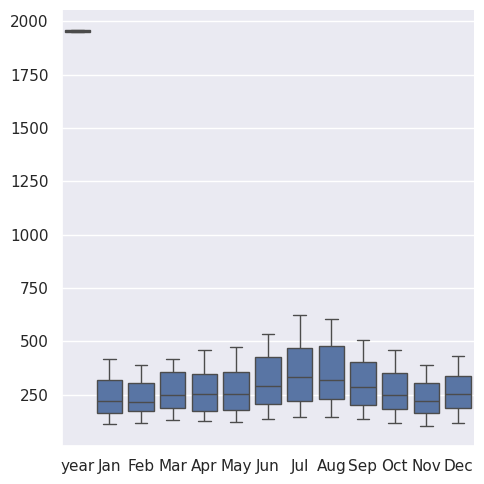

In [8]:
sns.catplot(data=flights_wide, kind="box")

Text(0.7, 0.81, 'Wide-form')

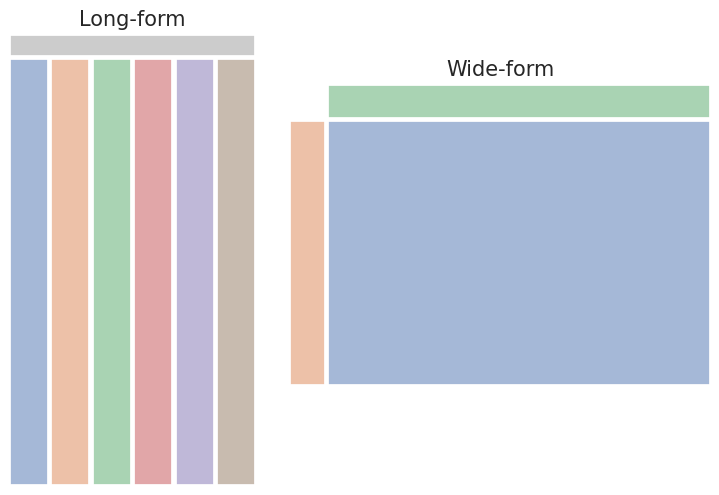

In [9]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7, 5))

gs = plt.GridSpec(
    ncols=6, nrows=2, figure=f,
    left=0, right=.35, bottom=0, top=.9,
    height_ratios=(1, 20),
    wspace=.1, hspace=.01
)

colors = [c + (.5,) for c in sns.color_palette()]

f.add_subplot(gs[0, :], facecolor=".8")
[
    f.add_subplot(gs[1:, i], facecolor=colors[i])
    for i in range(gs.ncols)
]

gs = plt.GridSpec(
    ncols=2, nrows=2, figure=f,
    left=.4, right=1, bottom=.2, top=.8,
    height_ratios=(1, 8), width_ratios=(1, 11),
    wspace=.015, hspace=.02
)

f.add_subplot(gs[0, 1:], facecolor=colors[2])
f.add_subplot(gs[1:, 0], facecolor=colors[1])
f.add_subplot(gs[1, 1], facecolor=colors[0])

for ax in f.axes:
    ax.set(xticks=[], yticks=[])

f.text(.35 / 2, .91, "Long-form", ha="center", va="bottom", size=15)
f.text(.7, .81, "Wide-form", ha="center", va="bottom", size=15)

In [10]:
anagrams = sns.load_dataset("anagrams")
anagrams

subidr,attnr,num1,num2,num3
i64,str,i64,f64,i64
1,"""divided""",2,4.0,7
2,"""divided""",3,4.0,5
3,"""divided""",3,5.0,6
4,"""divided""",5,7.0,5
5,"""divided""",4,5.0,8
6,"""divided""",5,5.0,6
7,"""divided""",5,4.5,6
8,"""divided""",5,7.0,8
9,"""divided""",2,3.0,7


In [11]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], variable_name="solutions", value_name="score")
anagrams_long.head()

subidr,attnr,solutions,score
i64,str,str,f64
1,"""divided""","""num1""",2.0
2,"""divided""","""num1""",3.0
3,"""divided""","""num1""",3.0
4,"""divided""","""num1""",5.0
5,"""divided""","""num1""",4.0


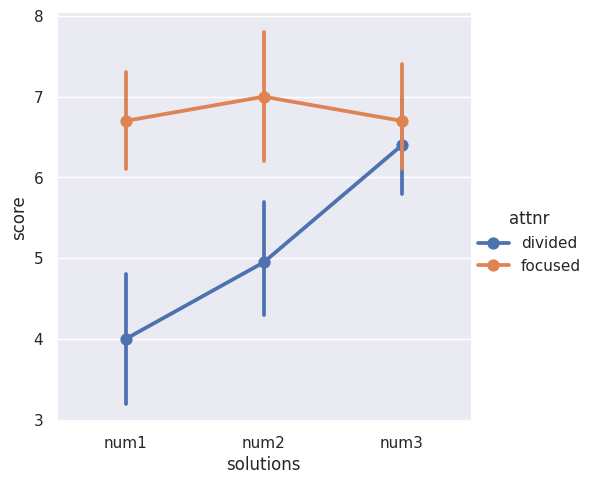

In [12]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

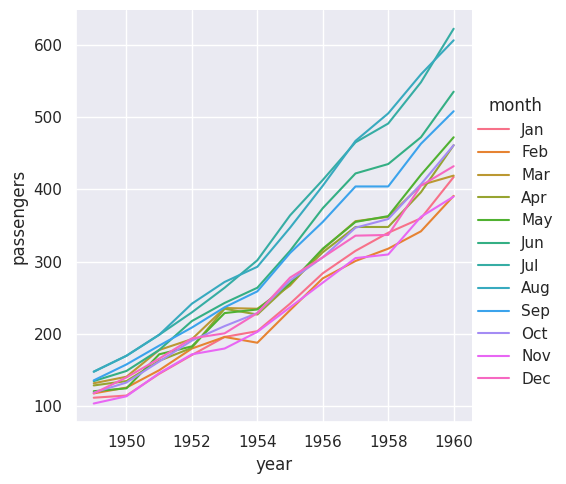

In [13]:
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

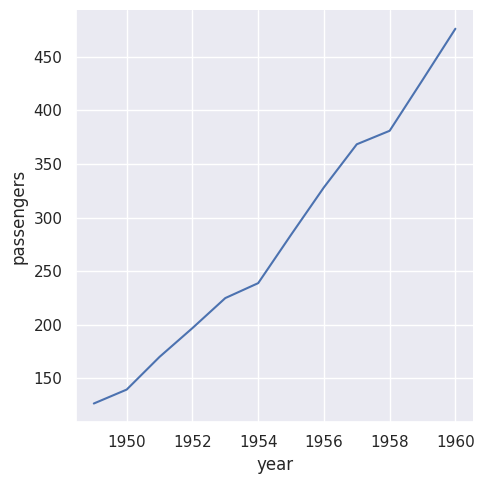

In [14]:
flights_avg = flights.groupby("year").mean()
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line")

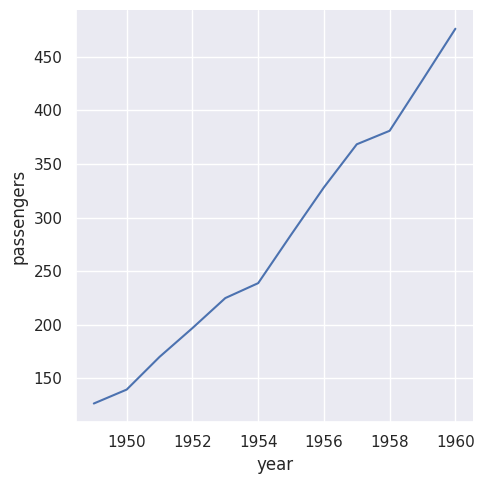

In [15]:
year = flights_avg['year']
passengers = flights_avg["passengers"]
sns.relplot(x=year, y=passengers, kind="line")

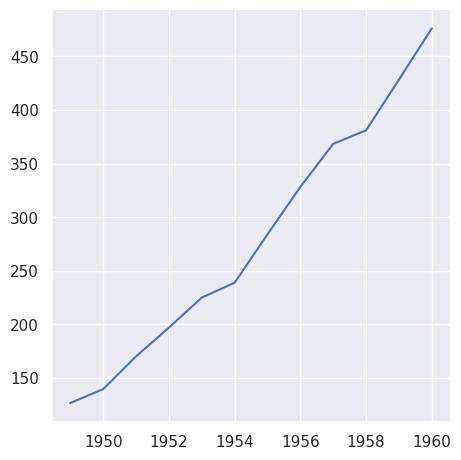

In [16]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line")

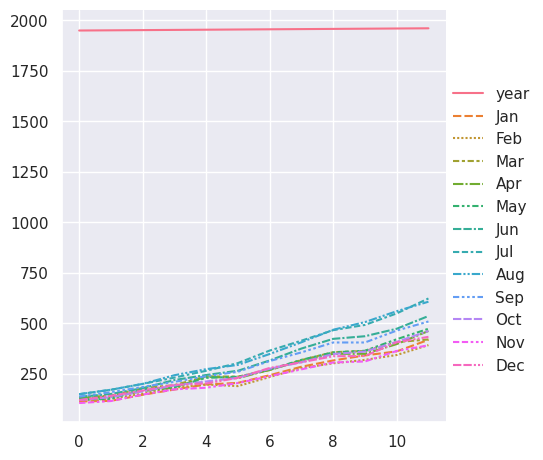

In [17]:
flights_wide_list = [flights_wide[col] for col in flights_wide.columns]
sns.relplot(data=flights_wide_list, kind="line")

In [18]:
flights_wide

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


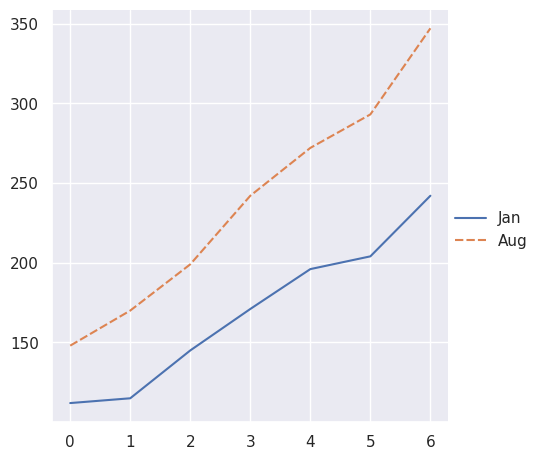

In [19]:
two_series = [flights_wide.filter(pl.col('year')<=1955)["Jan"], flights_wide.filter(pl.col('year')<=1955)["Aug"]]
sns.relplot(data=two_series, kind="line")

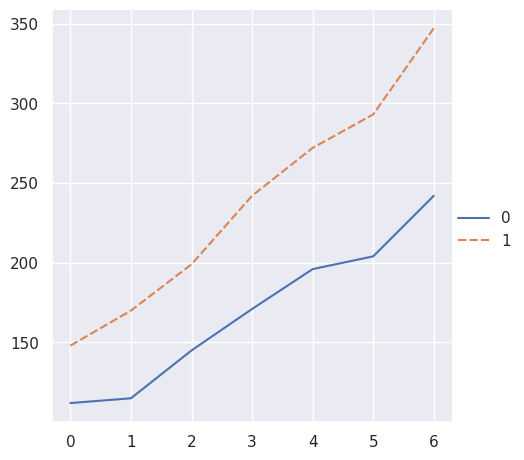

In [20]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line")

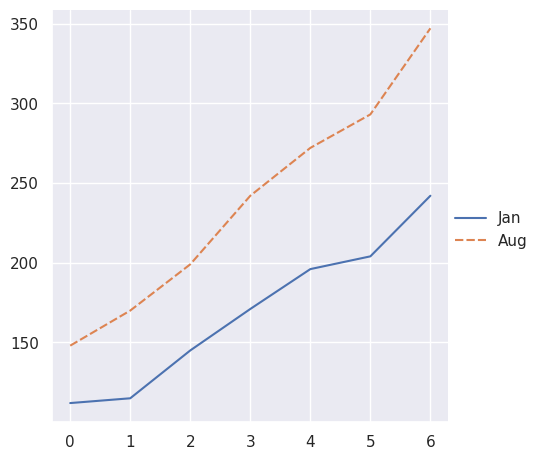

In [21]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

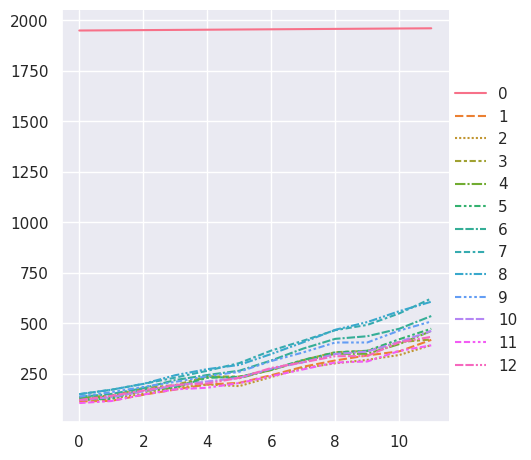

In [22]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line")